In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full (1).csv


In [ ]:
data = pd.read_csv("bank-full.csv",delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.DataFrame(data)

# Get an overview of the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Summary statistics
df.describe()



,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Check for missing values
df.isnull().sum()



age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

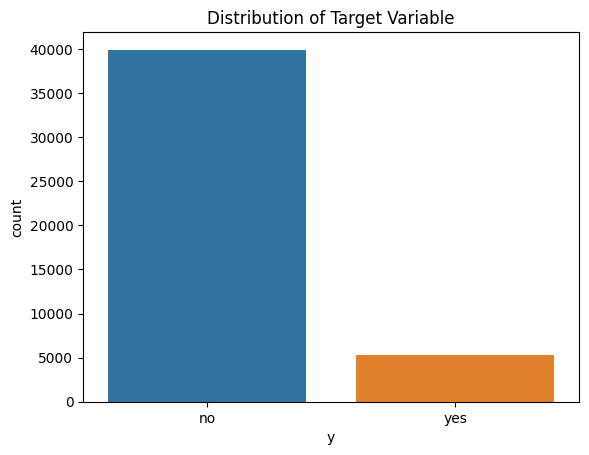

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()


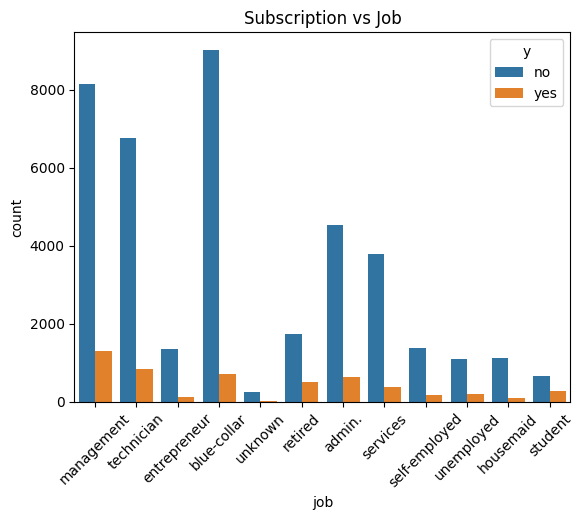

In [ ]:
# Explore the relationship between the target variable and other categorical variables
sns.countplot(x='job', hue='y', data=df)
plt.title('Subscription vs Job')
plt.xticks(rotation=45)
plt.show()

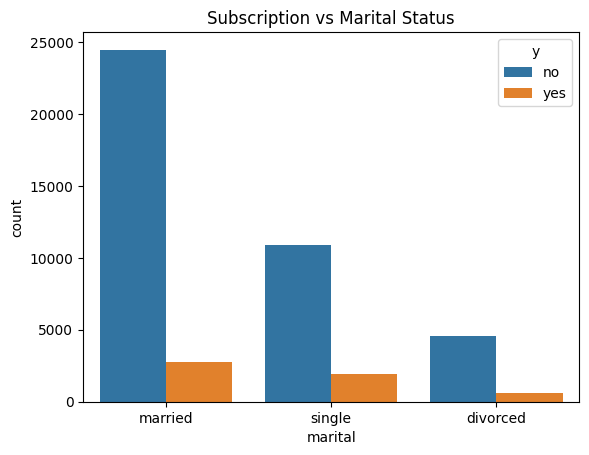

In [ ]:
sns.countplot(x='marital', hue='y', data=df)
plt.title('Subscription vs Marital Status')
plt.show()


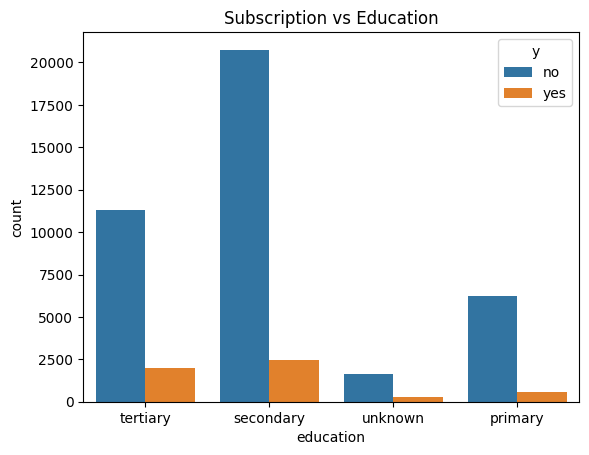

In [ ]:
sns.countplot(x='education', hue='y', data=df)
plt.title('Subscription vs Education')
plt.show()


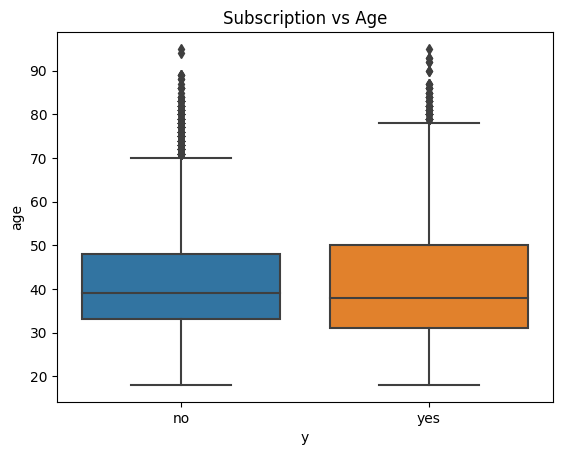

In [ ]:
# Explore the relationship between the target variable and numerical variables
sns.boxplot(x='y', y='age', data=df)
plt.title('Subscription vs Age')
plt.show()


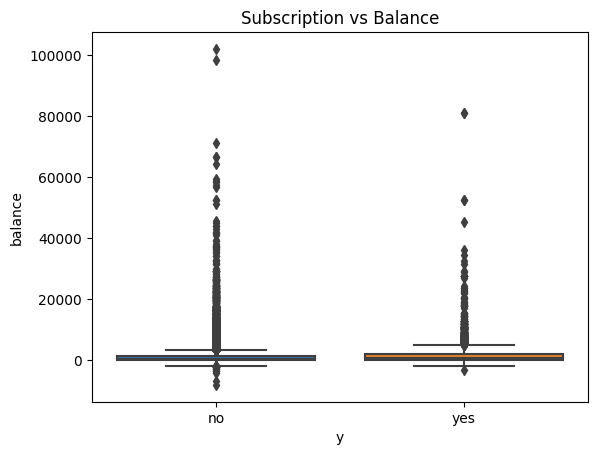

In [ ]:
sns.boxplot(x='y', y='balance', data=df)
plt.title('Subscription vs Balance')
plt.show()

In [ ]:
#Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)


In [ ]:
# Define the features and target variable
X = df.drop('y', axis=1)
y = df['y']


In [ ]:
y


0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
classifier=LogisticRegression()

In [37]:
from sklearn.model_selection import GridSearchCV
parameter={"penalty":["l1","l2","elasticnet"],"C":[1,2,3,4,5,6,7,10,20,30,40],"max_iter":[100,200,300]}

In [38]:

classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring="accuracy",cv=5)

In [39]:
classifier_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
classifier_regressor.best_params_

{'C': 7, 'max_iter': 300, 'penalty': 'l2'}

In [42]:
classifier_regressor.best_score_

0.8990545017210424

In [44]:
y_pred=classifier_regressor.predict(X_test)

In [51]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8962733606104168


In [46]:
# Display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_pred, y_test)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[7766  186]
 [ 752  339]]


In [50]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.65      0.31      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



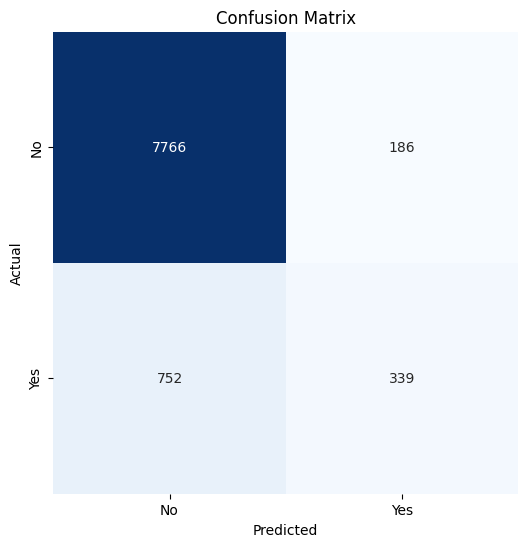

In [52]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()